# Chocolate Bar Ratings - Data Science Final Project
### Ariel Todoki, Sophia Anderson, Madison Malone

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# use to display plots in ipython notebook
#%matplotlib inline

## Read in Data
### Path is set so that the csv file is in the same directory as the ipython notebook file
### Save as Pandas Data Frame called Cacao

In [25]:
cacao = pd.read_csv('flavors_of_cacao.csv')

In [26]:
cacao.columns = ['Company', 'SpecificOrigin_BarName','REF','ReviewDate','CocoaPerc','CompLoc','Rating','BeanType','BroadBeanOrigin']

In [27]:
cacao.head()

,Company,SpecificOrigin_BarName,REF,ReviewDate,CocoaPerc,CompLoc,Rating,BeanType,BroadBeanOrigin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,NaN,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,NaN,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,NaN,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,NaN,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,NaN,Peru


In [28]:
cacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
Company                   1795 non-null object
SpecificOrigin_BarName    1795 non-null object
REF                       1795 non-null int64
ReviewDate                1795 non-null int64
CocoaPerc                 1795 non-null float64
CompLoc                   1795 non-null object
Rating                    1795 non-null float64
BeanType                  907 non-null object
BroadBeanOrigin           1721 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 126.3+ KB


### Sort by Rating, highest to lowest

In [29]:
sort_rating = cacao.sort_values(by = 'Rating', ascending = False)
sort_rating.head()

,Company,SpecificOrigin_BarName,REF,ReviewDate,CocoaPerc,CompLoc,Rating,BeanType,BroadBeanOrigin
78,Amedei,Chuao,111,2007,0.70,Italy,5.0,Trinitario,Venezuela
86,Amedei,Toscano Black,40,2006,0.70,Italy,5.0,Blend,NaN
222,Bonnat,Kaori,1339,2014,0.75,France,4.0,NaN,Brazil
76,Amedei,Porcelana,111,2007,0.70,Italy,4.0,Criollo (Porcelana),Venezuela
1663,Tobago Estate (Pralus),"Roxborough, Tobago",895,2012,0.70,France,4.0,Trinitario,Tobago


### Sort by cocoa percent, lowest to highest

In [30]:
sort_percent = cacao.sort_values(by = 'CocoaPerc')
sort_percent.head()

,Company,SpecificOrigin_BarName,REF,ReviewDate,CocoaPerc,CompLoc,Rating,BeanType,BroadBeanOrigin
429,Chokolat Elot (Girard),Guadeloupe,1149,2013,0.42,Martinique,2.75,NaN,Martinique
984,Luker,Selva,552,2010,0.46,Colombia,2.75,NaN,"Colombia, Ecuador"
90,AMMA,"Monte Alegre, 3 diff. plantations",572,2010,0.50,Brazil,3.75,Forastero (Parazinho),Brazil
1423,Santander (Compania Nacional),Colombian Semi Dark,32,2006,0.53,Colombia,2.00,Forastero (Nacional),Colombia
1350,Q Chocolate,Brazil,1069,2013,0.55,Brazil,2.75,NaN,Brazil


## Find the max rating from each company

In [31]:
maxCompRating = cacao.groupby('Company')['Rating'].max()
maxCompRating = maxCompRating.sort_values(ascending = False)
maxCompRating.head()

Company
Amedei      5.0
A. Morin    4.0
Danta       4.0
Durci       4.0
Ritual      4.0
Name: Rating, dtype: float64

## Histograms of Ratings

(array([  4.,  13.,  32., 141., 259., 644., 602.,  98.,   0.,   2.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

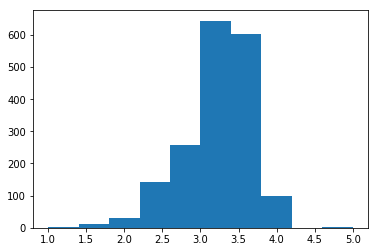

In [32]:
plt.hist(cacao[cacao.columns[6]])

In [35]:
# mean rating for each company
cacao.pivot_table('Rating', columns = 'Company', aggfunc = np.mean)

Company,A. Morin,AMMA,Acalli,Adi,Aequare (Gianduja),Ah Cacao,Akesson's (Pralus),Alain Ducasse,Alexandre,Altus aka Cao Artisan,...,Xocolla,Zak's,Zart Pralinen,Zokoko,Zotter,hello cocoa,hexx,iQ Chocolate,organicfair,twenty-four blackbirds
Rating,3.380435,3.5,3.75,3.25,2.875,3.0,3.083333,2.7,3.5,2.85,...,2.625,3.208333,3.166667,3.55,3.308824,3.125,3.05,2.875,2.85,3.041667


In [36]:
# mean rating from each broad bean origin location
bbo = cacao.groupby('BroadBeanOrigin')['Rating'].mean()
bbo.head()

BroadBeanOrigin
Africa, Carribean, C. Am.    2.750000
Australia                    3.250000
Belize                       3.234694
Bolivia                      3.197368
Brazil                       3.284483
Name: Rating, dtype: float64

In [37]:
#subsets into relevant columns
relevant = cacao.iloc[:, [0, 4, 6, 7, 8]]

#gives df with data points that have a Bean Type
with_bt = relevant.dropna(axis=0, subset=["BeanType"])

#gives df with data points that have a BBO
with_bbo = relevant.dropna(axis=0, subset=["BroadBeanOrigin"])

#gives df with data points that have a BBO and a BT
with_both = relevant.dropna(axis=0, how='any')


#add min max columns to the table, maybe averages too?
# add a count of how many bars are in that catagory
##these are 3 seperate tables


#ask professor how to work with words bc the broad bean origin is shaky
## use examples from the babay names lab thing
#get screenshots of the maps from Tableau to put in doument and presentation
#talk to her about how to run a knn when you've only got 2 types of numbers to work with



In [146]:
with_bt.groupby('BroadBeanOrigin')['Rating'].mean().head()

BroadBeanOrigin
Belize       3.216667
Bolivia      3.294118
Brazil       3.333333
Cameroon     3.250000
Carribean    3.250000
Name: Rating, dtype: float64

In [39]:
with_bbo.head()

,Company,CocoaPerc,Rating,BeanType,BroadBeanOrigin
0,A. Morin,0.63,3.75,NaN,Sao Tome
1,A. Morin,0.70,2.75,NaN,Togo
2,A. Morin,0.70,3.00,NaN,Togo
3,A. Morin,0.70,3.50,NaN,Togo
4,A. Morin,0.70,3.50,NaN,Peru


In [40]:
with_both.head()

,Company,CocoaPerc,Rating,BeanType,BroadBeanOrigin
5,A. Morin,0.7,2.75,Criollo,Venezuela
7,A. Morin,0.7,3.50,Criollo,Venezuela
8,A. Morin,0.7,3.75,Criollo,Venezuela
11,A. Morin,0.7,3.00,Criollo,Madagascar
17,A. Morin,0.7,4.00,Trinitario,Venezuela


In [153]:
uniqueBean = with_bt.BeanType.unique()
uniqueBean

array(['Criollo', 'Trinitario', 'Forastero (Arriba)', 'Forastero',
       'Forastero (Nacional)', 'Criollo, Trinitario',
       'Criollo (Porcelana)', 'Blend', 'Trinitario (85% Criollo)',
       'Forastero (Catongo)', 'Forastero (Parazinho)',
       'Trinitario, Criollo', 'CCN51', 'Criollo (Ocumare)', 'Nacional',
       'Criollo (Ocumare 61)', 'Criollo (Ocumare 77)',
       'Criollo (Ocumare 67)', 'Criollo (Wild)', 'Beniano', 'Amazon mix',
       'Trinitario, Forastero', 'Forastero (Arriba) ASS', 'Criollo, +',
       'Amazon', 'Amazon, ICS', 'EET', 'Blend-Forastero,Criollo',
       'Trinitario (Scavina)', 'Criollo, Forastero', 'Matina',
       'Forastero(Arriba, CCN)', 'Nacional (Arriba)',
       'Forastero (Arriba) ASSS', 'Forastero, Trinitario',
       'Forastero (Amelonado)', 'Trinitario, Nacional',
       'Trinitario (Amelonado)', 'Trinitario, TCGA', 'Criollo (Amarru)'],
      dtype=object)

In [154]:
#grabs all the bars that have the criollo bean in their mix
crio_mask = np.array(['criollo' in x.lower() for x in uniqueBean])
all_Crio = uniqueBean[crio_mask]
all_Crio

array(['Criollo', 'Criollo, Trinitario', 'Criollo (Porcelana)',
       'Trinitario (85% Criollo)', 'Trinitario, Criollo',
       'Criollo (Ocumare)', 'Criollo (Ocumare 61)',
       'Criollo (Ocumare 77)', 'Criollo (Ocumare 67)', 'Criollo (Wild)',
       'Criollo, +', 'Blend-Forastero,Criollo', 'Criollo, Forastero',
       'Criollo (Amarru)'], dtype=object)

In [155]:
#grabs all the bars that have the trinitario bean in their mix
trini_mask = np.array(['trinitario' in x.lower() for x in uniqueBean])
all_Trini = uniqueBean[trini_mask]
all_Trini

array(['Trinitario', 'Criollo, Trinitario', 'Trinitario (85% Criollo)',
       'Trinitario, Criollo', 'Trinitario, Forastero',
       'Trinitario (Scavina)', 'Forastero, Trinitario',
       'Trinitario, Nacional', 'Trinitario (Amelonado)',
       'Trinitario, TCGA'], dtype=object)

In [156]:
#grabs all the bars that have the forastero bean in their mix
fora_mask = np.array(['forastero' in x.lower() for x in uniqueBean])
all_Fora = uniqueBean[fora_mask]
all_Fora

array(['Forastero (Arriba)', 'Forastero', 'Forastero (Nacional)',
       'Forastero (Catongo)', 'Forastero (Parazinho)',
       'Trinitario, Forastero', 'Forastero (Arriba) ASS',
       'Blend-Forastero,Criollo', 'Criollo, Forastero',
       'Forastero(Arriba, CCN)', 'Forastero (Arriba) ASSS',
       'Forastero, Trinitario', 'Forastero (Amelonado)'], dtype=object)

In [171]:
#grabs all the bars that are a blend
blend_mask = np.array(['blend' in x.lower() for x in uniqueBean])
all_Blend = uniqueBean[blend_mask]
all_Blend

array(['Blend', 'Blend-Forastero,Criollo'], dtype=object)

In [45]:
#filter data to get selected beans
crioFilter = with_bt[with_bt.BeanType.isin(all_Crio)]
crioFilter.head()

,Company,CocoaPerc,Rating,BeanType,BroadBeanOrigin
5,A. Morin,0.7,2.75,Criollo,Venezuela
7,A. Morin,0.7,3.50,Criollo,Venezuela
8,A. Morin,0.7,3.75,Criollo,Venezuela
11,A. Morin,0.7,3.00,Criollo,Madagascar
24,Acalli,0.7,3.75,Criollo,Peru


In [23]:
#plot the cocoa percentage vs rating in scatter plot
fig1 = sns.lmplot(x= 'Rating', y = 'CocoaPerc', data = crioFilter)

In [24]:
#filter data to get selected beans
triniFilter = with_bt[with_bt.BeanType.isin(all_Trini)]
triniFilter.head()

,Company,CocoaPerc,Rating,BeanType,BroadBeanOrigin
17,A. Morin,0.70,4.00,Trinitario,Venezuela
25,Adi,0.60,2.75,Trinitario,Fiji
26,Adi,0.80,3.25,Trinitario,Fiji
27,Adi,0.88,3.50,Trinitario,Fiji
28,Adi,0.72,3.50,Trinitario,Fiji


In [25]:
#plot the cocoa percentage vs rating in scatter plot
fig2 = sns.lmplot(x= 'Rating', y = 'CocoaPerc', data = triniFilter)

In [26]:
#filter data to get selected beans
foraFilter = with_bt[with_bt.BeanType.isin(all_Fora)]
foraFilter.head()

,Company,CocoaPerc,Rating,BeanType,BroadBeanOrigin
29,Aequare (Gianduja),0.55,2.75,Forastero (Arriba),Ecuador
30,Aequare (Gianduja),0.70,3.00,Forastero (Arriba),Ecuador
34,Akesson's (Pralus),0.75,2.75,Forastero,Brazil
40,Alexandre,0.70,3.50,Forastero (Nacional),Ecuador
43,Alexandre,0.70,3.50,Forastero,Tanzania


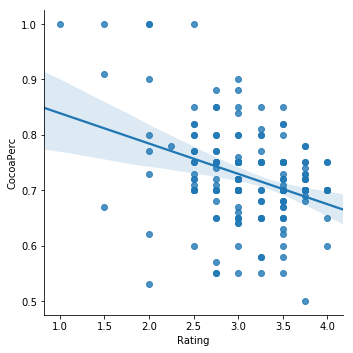

In [76]:
#plot the cocoa percentage vs rating in scatter plot
fig3 = sns.lmplot(x= 'Rating', y = 'CocoaPerc', data = foraFilter)

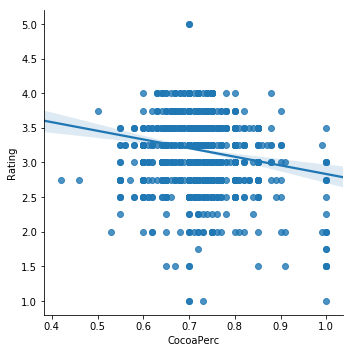

In [77]:
fig = sns.lmplot(x= 'CocoaPerc', y = 'Rating', data = cacao)

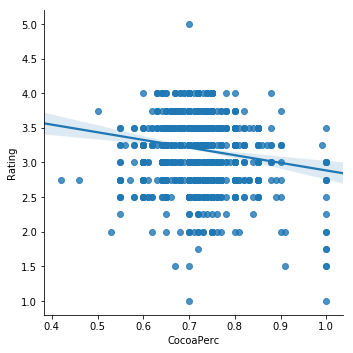

In [78]:
fig = sns.lmplot(x= 'CocoaPerc', y = 'Rating', data = with_bbo)

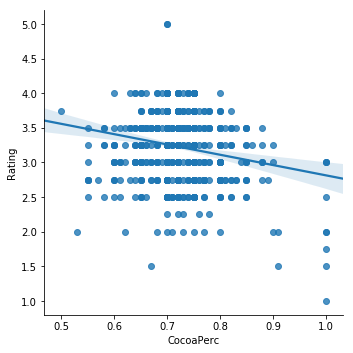

In [79]:
fig = sns.lmplot(x= 'CocoaPerc', y = 'Rating', data = with_bt)

# Company Profiles

In [159]:
# Count of the 10 companies with the highest number of rated chocolate bars
company_count = cacao.groupby('Company').Company.count()
company_count = company_count.sort_values(ascending = False)
company_count.head(10)
company_count = company_count.to_frame(name='Bar Count')
company_count.head(10)

,Bar Count
Company,
Soma,47
Bonnat,27
Fresco,26
Pralus,25
A. Morin,23
Domori,22
Guittard,22
Arete,22
Valrhona,21


## Soma

In [160]:
#grab the bars made by Soma
uniqueCompany = cacao.Company.unique()
Soma_mask = np.array(['soma' in x.lower() for x in uniqueCompany])
all_Soma = uniqueCompany[Soma_mask]
all_Soma

array(['Soma'], dtype=object)

In [196]:
#filter data to get selected company bars that have Bean Type data
somaFilter = cacao[cacao.Company.isin(all_Soma)]
soma_bt = somaFilter.dropna(axis=0, subset=["BeanType"])
soma_bt.head()

,Company,SpecificOrigin_BarName,REF,ReviewDate,CocoaPerc,CompLoc,Rating,BeanType,BroadBeanOrigin
1508,Soma,"Sambirano Valley, Black Science, B-60307.0",1820,2016,0.7,Canada,3.50,Trinitario,Madagascar
1509,Soma,"Bahia Black, batch bra50722.1",1828,2016,0.7,Canada,3.50,Forastero (Parazinho),Brazil
1511,Soma,"Chuno, San Jose de Bocay, Pantasma R.,B.S.",1828,2016,0.7,Canada,3.75,Trinitario,Nicaragua
1512,Soma,"Tien Giang, Black S., batch VIT60420.0",1828,2016,0.7,Canada,4.00,Trinitario,Vietnam
1514,Soma,CSB Chama,1594,2015,0.7,Canada,3.50,Criollo,Venezuela


In [198]:
soma_btNum = soma_bt.groupby('BeanType')['BeanType'].count().sort_values(ascending = False)
soma_btNum

BeanType
Trinitario               13
Criollo                   8
Forastero                 4
Blend                     4
Forastero (Nacional)      2
Trinitario, Nacional      1
Nacional                  1
Forastero (Parazinho)     1
Forastero (Amelonado)     1
Name: BeanType, dtype: int64

In [145]:
soma_avgs = soma_bt.groupby('BeanType')['Rating'].mean().sort_values(ascending = False)
soma_avgs

BeanType
Trinitario, Nacional     3.750000
Forastero (Amelonado)    3.750000
Blend                    3.687500
Forastero (Nacional)     3.625000
Trinitario               3.538462
Criollo                  3.531250
Nacional                 3.500000
Forastero (Parazinho)    3.500000
Forastero                3.375000
Name: Rating, dtype: float64

In [254]:
#filter data to get selected beans
crioFilter = soma_bt[soma_bt.BeanType.isin(all_Crio)].mean().Rating
foraFilter = soma_bt[soma_bt.BeanType.isin(all_Fora)].mean().Rating
triniFilter = soma_bt[soma_bt.BeanType.isin(all_Trini)].mean().Rating
blendFilter = soma_bt[soma_bt.BeanType.isin(all_Blend)].mean().Rating

d = {'Soma': [crioFilter, foraFilter, triniFilter, blendFilter]}
beanFrame = pd.DataFrame(data=d)
beanFrame.index = ['Criollo','Forastero','Trinitario', 'Blend']
beanFrame

,Soma
Criollo,3.531250
Forastero,3.500000
Trinitario,3.553571
Blend,3.687500


## Bonnat

In [133]:
Bonnat_mask = np.array(['bonnat' in x.lower() for x in uniqueCompany])
all_Bonnat = uniqueCompany[Bonnat_mask]
all_Bonnat

array(['Bonnat', 'Friis Holm (Bonnat)'], dtype=object)

In [200]:
#filter data to get selected company bars that have Bean Type data
bonnatFilter = cacao[cacao.Company.isin(all_Bonnat)]
bonnat_bt = bonnatFilter.dropna(axis=0, subset=["BeanType"])
bonnat_bt.head()

,Company,SpecificOrigin_BarName,REF,ReviewDate,CocoaPerc,CompLoc,Rating,BeanType,BroadBeanOrigin
227,Bonnat,Cuba,629,2011,0.75,France,3.50,Trinitario,Cuba
229,Bonnat,Piura Blanco,629,2011,0.75,France,3.50,Forastero (Nacional),Peru
232,Bonnat,"Madagascar, 100% criollo",629,2011,0.75,France,4.00,Criollo,Madagascar
234,Bonnat,Jamaique,761,2011,0.75,France,3.25,Trinitario,Jamaica
236,Bonnat,"Porcelana, Apotequil",336,2009,0.75,France,2.75,Criollo,Peru


In [201]:
bonnat_btNum = bonnat_bt.groupby('BeanType')['BeanType'].count().sort_values(ascending = False)
bonnat_btNum

BeanType
Criollo, Trinitario     6
Trinitario              5
Criollo                 5
Forastero (Nacional)    1
Forastero (Arriba)      1
Criollo (Porcelana)     1
Name: BeanType, dtype: int64

In [202]:
bonnat_avgs = bonnat_bt.groupby('BeanType')['Rating'].mean().sort_values(ascending = False)
bonnat_avgs

BeanType
Criollo (Porcelana)     4.000000
Trinitario              3.700000
Forastero (Nacional)    3.500000
Criollo                 3.350000
Criollo, Trinitario     3.333333
Forastero (Arriba)      2.500000
Name: Rating, dtype: float64

In [260]:
#filter data to get selected beans
crioFilter = bonnat_bt[bonnat_bt.BeanType.isin(all_Crio)].mean().Rating
foraFilter = bonnat_bt[bonnat_bt.BeanType.isin(all_Fora)].mean().Rating
triniFilter = bonnat_bt[bonnat_bt.BeanType.isin(all_Trini)].mean().Rating
blendFilter = bonnat_bt[bonnat_bt.BeanType.isin(all_Blend)].mean().Rating

d = [crioFilter, foraFilter, triniFilter, blendFilter]
beanFrame['Bonnat'] = d
beanFrame

,Soma,Bonnat
Criollo,3.531250,3.395833
Forastero,3.500000,3.000000
Trinitario,3.553571,3.500000
Blend,3.687500,NaN


## Fresco

In [213]:
fresco_mask = np.array(['fresco' in x.lower() for x in uniqueCompany])
all_Fresco = uniqueCompany[fresco_mask]
all_Fresco

array(['Fresco'], dtype=object)

In [214]:
#filter data to get selected company bars that have Bean Type data
frescoFilter = cacao[cacao.Company.isin(all_Fresco)]
fresco_bt = frescoFilter.dropna(axis=0, subset=["BeanType"])
fresco_bt.head()

,Company,SpecificOrigin_BarName,REF,ReviewDate,CocoaPerc,CompLoc,Rating,BeanType,BroadBeanOrigin
679,Fresco,"Maranon, #228, MR, SC",1383,2014,0.7,U.S.A.,3.0,Forastero (Nacional),Peru
680,Fresco,"Maranon, #227, LR, MC",1383,2014,0.7,U.S.A.,3.5,Forastero (Nacional),Peru
681,Fresco,"Maranon, #229, MR, LC",1383,2014,0.7,U.S.A.,3.5,Forastero (Nacional),Peru
682,Fresco,"Maranon, #230, DR, LC",1387,2014,0.7,U.S.A.,3.5,Forastero (Nacional),Peru
686,Fresco,"Bellavista Coop, #225, LR, MC, CG Exclusive",1149,2013,0.7,U.S.A.,4.0,Trinitario,Peru


In [215]:
fresco_btNum = fresco_bt.groupby('BeanType')['BeanType'].count().sort_values(ascending = False)
fresco_btNum

BeanType
Trinitario              13
Forastero (Nacional)     4
Forastero                1
Criollo                  1
Name: BeanType, dtype: int64

In [216]:
fresco_avgs = fresco_bt.groupby('BeanType')['Rating'].mean().sort_values(ascending = False)
fresco_avgs

BeanType
Criollo                 3.500000
Forastero (Nacional)    3.375000
Trinitario              3.365385
Forastero               2.750000
Name: Rating, dtype: float64

In [261]:
#filter data to get selected beans
crioFilter = fresco_bt[fresco_bt.BeanType.isin(all_Crio)].mean().Rating
foraFilter = fresco_bt[fresco_bt.BeanType.isin(all_Fora)].mean().Rating
triniFilter = fresco_bt[fresco_bt.BeanType.isin(all_Trini)].mean().Rating
blendFilter = fresco_bt[fresco_bt.BeanType.isin(all_Blend)].mean().Rating

d = [crioFilter, foraFilter, triniFilter, blendFilter]
beanFrame['Fresco'] = d
beanFrame

,Soma,Bonnat,Fresco
Criollo,3.531250,3.395833,3.500000
Forastero,3.500000,3.000000,3.250000
Trinitario,3.553571,3.500000,3.365385
Blend,3.687500,NaN,NaN


## Pralus

In [262]:
Pralus_mask = np.array(['pralus' in x.lower() for x in uniqueCompany])
all_Pralus = uniqueCompany[Pralus_mask]
all_Pralus

array(["Akesson's (Pralus)", 'Chuao Chocolatier (Pralus)', 'Pralus',
       'Tobago Estate (Pralus)'], dtype=object)

In [263]:
#filter data to get selected company bars that have Bean Type data
pralusFilter = cacao[cacao.Company.isin(all_Pralus)]
pralus_bt = pralusFilter.dropna(axis=0, subset=["BeanType"])
pralus_bt.head()

,Company,SpecificOrigin_BarName,REF,ReviewDate,CocoaPerc,CompLoc,Rating,BeanType,BroadBeanOrigin
32,Akesson's (Pralus),"Bali (west), Sukrama Family, Melaya area",636,2011,0.75,Switzerland,3.75,Trinitario,Indonesia
33,Akesson's (Pralus),"Madagascar, Ambolikapiky P.",502,2010,0.75,Switzerland,2.75,Criollo,Madagascar
34,Akesson's (Pralus),"Monte Alegre, D. Badero",508,2010,0.75,Switzerland,2.75,Forastero,Brazil
433,Chuao Chocolatier (Pralus),Chuao,486,2010,0.77,U.S.A.,2.75,Trinitario,Venezuela
1315,Pralus,"Porcelana, S. of Lake Maracaibo",717,2011,0.75,France,3.25,Criollo (Porcelana),Venezuela


In [264]:
pralus_btNum = pralus_bt.groupby('BeanType')['BeanType'].count().sort_values(ascending = False)
pralus_btNum

BeanType
Trinitario               12
Forastero                 5
Criollo                   5
Trinitario, Forastero     1
Criollo, Trinitario       1
Criollo, Forastero        1
Criollo (Porcelana)       1
Name: BeanType, dtype: int64

In [265]:
pralus_avgs = pralus_bt.groupby('BeanType')['Rating'].mean().sort_values(ascending = False)
pralus_avgs

BeanType
Criollo, Trinitario      4.000
Criollo, Forastero       3.500
Trinitario               3.375
Forastero                3.300
Criollo                  3.300
Criollo (Porcelana)      3.250
Trinitario, Forastero    3.000
Name: Rating, dtype: float64

In [266]:
#filter data to get selected beans
crioFilter = pralus_bt[pralus_bt.BeanType.isin(all_Crio)].mean().Rating
foraFilter = pralus_bt[pralus_bt.BeanType.isin(all_Fora)].mean().Rating
triniFilter = pralus_bt[pralus_bt.BeanType.isin(all_Trini)].mean().Rating
blendFilter = pralus_bt[pralus_bt.BeanType.isin(all_Blend)].mean().Rating

d = [crioFilter, foraFilter, triniFilter, blendFilter]
beanFrame['Pralus'] = d
beanFrame

,Soma,Bonnat,Fresco,Pralus
Criollo,3.531250,3.395833,3.500000,3.406250
Forastero,3.500000,3.000000,3.250000,3.285714
Trinitario,3.553571,3.500000,3.365385,3.392857
Blend,3.687500,NaN,NaN,NaN


## A. Morin

In [226]:
AMorin_mask = np.array(['a. morin' in x.lower() for x in uniqueCompany])
all_AMorin = uniqueCompany[AMorin_mask]
all_AMorin

array(['A. Morin', 'Black River (A. Morin)', 'Erithaj (A. Morin)',
       'Vietcacao (A. Morin)'], dtype=object)

In [230]:
#filter data to get selected company bars that have Bean Type data
AMorinFilter = cacao[cacao.Company.isin(all_AMorin)]
AMorin_bt = AMorinFilter.dropna(axis=0, subset=["BeanType"])
AMorin_bt.head()

,Company,SpecificOrigin_BarName,REF,ReviewDate,CocoaPerc,CompLoc,Rating,BeanType,BroadBeanOrigin
5,A. Morin,Carenero,1315,2014,0.7,France,2.75,Criollo,Venezuela
7,A. Morin,Sur del Lago,1315,2014,0.7,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,0.7,France,3.75,Criollo,Venezuela
11,A. Morin,Madagascar,1011,2013,0.7,France,3.00,Criollo,Madagascar
17,A. Morin,Chuao,1015,2013,0.7,France,4.00,Trinitario,Venezuela


In [231]:
AMorin_btNum = AMorin_bt.groupby('BeanType')['BeanType'].count().sort_values(ascending = False)
AMorin_btNum

BeanType
Trinitario    6
Criollo       4
Name: BeanType, dtype: int64

In [232]:
AMorin_avgs = AMorin_bt.groupby('BeanType')['Rating'].mean().sort_values(ascending = False)
AMorin_avgs

BeanType
Trinitario    3.291667
Criollo       3.250000
Name: Rating, dtype: float64

In [267]:
#filter data to get selected beans
crioFilter = AMorin_bt[AMorin_bt.BeanType.isin(all_Crio)].mean().Rating
foraFilter = AMorin_bt[AMorin_bt.BeanType.isin(all_Fora)].mean().Rating
triniFilter = AMorin_bt[AMorin_bt.BeanType.isin(all_Trini)].mean().Rating
blendFilter = AMorin_bt[AMorin_bt.BeanType.isin(all_Blend)].mean().Rating

d = [crioFilter, foraFilter, triniFilter, blendFilter]
beanFrame['A. Morin'] = d
beanFrame

,Soma,Bonnat,Fresco,Pralus,A. Morin
Criollo,3.531250,3.395833,3.500000,3.406250,3.250000
Forastero,3.500000,3.000000,3.250000,3.285714,NaN
Trinitario,3.553571,3.500000,3.365385,3.392857,3.291667
Blend,3.687500,NaN,NaN,NaN,NaN


## Domori

In [234]:
Domori_mask = np.array(['domori' in x.lower() for x in uniqueCompany])
all_Domori = uniqueCompany[Domori_mask]
all_Domori

array(['Domori'], dtype=object)

In [235]:
#filter data to get selected company bars that have Bean Type data
DomoriFilter = cacao[cacao.Company.isin(all_Domori)]
Domori_bt = DomoriFilter.dropna(axis=0, subset=["BeanType"])
Domori_bt.head()

,Company,SpecificOrigin_BarName,REF,ReviewDate,CocoaPerc,CompLoc,Rating,BeanType,BroadBeanOrigin
556,Domori,Ocumare 77,1672,2015,0.7,Italy,3.75,Criollo (Ocumare 77),Venezuela
557,Domori,"IL100, H. San Jose",1109,2013,1.0,Italy,3.00,Criollo,Venezuela
559,Domori,Guasare,863,2012,0.7,Italy,3.75,Criollo,Venezuela
560,Domori,"Canoabo, Hacienda San Jose",693,2011,0.7,Italy,3.50,Criollo,Venezuela
561,Domori,"Chuao, Hacienda San Jose",470,2010,0.7,Italy,3.00,Trinitario,Venezuela


In [236]:
Domori_btNum = Domori_bt.groupby('BeanType')['BeanType'].count().sort_values(ascending = False)
Domori_btNum

BeanType
Trinitario              7
Criollo                 5
Blend                   2
Forastero (Arriba)      1
Criollo (Porcelana)     1
Criollo (Ocumare 77)    1
Criollo (Ocumare 67)    1
Criollo (Ocumare 61)    1
Name: BeanType, dtype: int64

In [237]:
Domori_avgs = Domori_bt.groupby('BeanType')['Rating'].mean().sort_values(ascending = False)
Domori_avgs

BeanType
Forastero (Arriba)      4.000000
Criollo (Porcelana)     4.000000
Criollo (Ocumare 67)    4.000000
Criollo (Ocumare 77)    3.750000
Blend                   3.625000
Criollo                 3.500000
Criollo (Ocumare 61)    3.250000
Trinitario              3.214286
Name: Rating, dtype: float64

In [268]:
#filter data to get selected beans
crioFilter = Domori_bt[Domori_bt.BeanType.isin(all_Crio)].mean().Rating
foraFilter = Domori_bt[Domori_bt.BeanType.isin(all_Fora)].mean().Rating
triniFilter = Domori_bt[Domori_bt.BeanType.isin(all_Trini)].mean().Rating
blendFilter = Domori_bt[Domori_bt.BeanType.isin(all_Blend)].mean().Rating

d = [crioFilter, foraFilter, triniFilter, blendFilter]
beanFrame['Domori'] = d
beanFrame

,Soma,Bonnat,Fresco,Pralus,A. Morin,Domori
Criollo,3.531250,3.395833,3.500000,3.406250,3.250000,3.611111
Forastero,3.500000,3.000000,3.250000,3.285714,NaN,4.000000
Trinitario,3.553571,3.500000,3.365385,3.392857,3.291667,3.214286
Blend,3.687500,NaN,NaN,NaN,NaN,3.625000


## Guittard

In [239]:
Guittard_mask = np.array(['guittard' in x.lower() for x in uniqueCompany])
all_Guittard = uniqueCompany[Guittard_mask]
all_Guittard

array(['Dole (Guittard)', 'Guittard',
       'Heirloom Cacao Preservation (Guittard)', 'Malie Kai (Guittard)'],
      dtype=object)

In [240]:
#filter data to get selected company bars that have Bean Type data
GuittardFilter = cacao[cacao.Company.isin(all_Guittard)]
Guittard_bt = GuittardFilter.dropna(axis=0, subset=["BeanType"])
Guittard_bt.head()

,Company,SpecificOrigin_BarName,REF,ReviewDate,CocoaPerc,CompLoc,Rating,BeanType,BroadBeanOrigin
752,Guittard,Jamaica,1053,2013,0.65,U.S.A.,3.25,Trinitario,Jamaica
757,Guittard,Trinidad,552,2010,0.65,U.S.A.,3.00,Trinitario,Trinidad
760,Guittard,Complexite,387,2009,0.70,U.S.A.,3.50,Blend,NaN
764,Guittard,Quetzalcoatl,147,2007,0.72,U.S.A.,3.50,Blend,NaN
765,Guittard,Chucuri,15,2006,0.65,U.S.A.,3.00,Trinitario,Colombia


In [241]:
Guittard_btNum = Guittard_bt.groupby('BeanType')['BeanType'].count().sort_values(ascending = False)
Guittard_btNum

BeanType
Blend                  5
Trinitario             3
Trinitario, Criollo    1
Forastero (Arriba)     1
EET                    1
Criollo, +             1
Beniano                1
Amazon, ICS            1
Name: BeanType, dtype: int64

In [242]:
Guittard_avgs = Guittard_bt.groupby('BeanType')['Rating'].mean().sort_values(ascending = False)
Guittard_avgs

BeanType
EET                    3.750000
Forastero (Arriba)     3.500000
Criollo, +             3.500000
Amazon, ICS            3.500000
Blend                  3.250000
Trinitario             3.083333
Beniano                3.000000
Trinitario, Criollo    2.500000
Name: Rating, dtype: float64

In [270]:
#filter data to get selected beans
crioFilter = Guittard_bt[Guittard_bt.BeanType.isin(all_Crio)].mean().Rating
foraFilter = Guittard_bt[Guittard_bt.BeanType.isin(all_Fora)].mean().Rating
triniFilter = Guittard_bt[Guittard_bt.BeanType.isin(all_Trini)].mean().Rating
blendFilter = Guittard_bt[Guittard_bt.BeanType.isin(all_Blend)].mean().Rating

d = [crioFilter, foraFilter, triniFilter, blendFilter]
beanFrame['Guittard'] = d
beanFrame

,Soma,Bonnat,Fresco,Pralus,A. Morin,Domori,Guittard
Criollo,3.531250,3.395833,3.500000,3.406250,3.250000,3.611111,3.0000
Forastero,3.500000,3.000000,3.250000,3.285714,NaN,4.000000,3.5000
Trinitario,3.553571,3.500000,3.365385,3.392857,3.291667,3.214286,2.9375
Blend,3.687500,NaN,NaN,NaN,NaN,3.625000,3.2500


## Arete

In [244]:
Arete_mask = np.array(['arete' in x.lower() for x in uniqueCompany])
all_Arete = uniqueCompany[Arete_mask]
all_Arete

array(['Arete'], dtype=object)

In [245]:
#filter data to get selected company bars that have Bean Type data
AreteFilter = cacao[cacao.Company.isin(all_Arete)]
Arete_bt = AreteFilter.dropna(axis=0, subset=["BeanType"])
Arete_bt.head()

,Company,SpecificOrigin_BarName,REF,ReviewDate,CocoaPerc,CompLoc,Rating,BeanType,BroadBeanOrigin
99,Arete,San Juan,1724,2016,0.70,U.S.A.,3.50,Trinitario,Trinidad
101,Arete,Tien Giang,1900,2016,0.73,U.S.A.,3.50,Trinitario,Vietnam
108,Arete,Phantom,1924,2016,0.70,U.S.A.,4.00,Forastero (Nacional),Peru
113,Arete,Nacional,1534,2015,0.68,U.S.A.,3.50,Forastero (Nacional),Peru
114,Arete,"Puerto Quito, heirloom",1534,2015,0.70,U.S.A.,3.75,Forastero (Nacional),Ecuador


In [246]:
Arete_btNum = Arete_bt.groupby('BeanType')['BeanType'].count().sort_values(ascending = False)
Arete_btNum

BeanType
Trinitario              3
Forastero (Nacional)    3
Criollo, Trinitario     1
Name: BeanType, dtype: int64

In [247]:
Arete_avgs = Arete_bt.groupby('BeanType')['Rating'].mean().sort_values(ascending = False)
Arete_avgs

BeanType
Criollo, Trinitario     4.000000
Forastero (Nacional)    3.750000
Trinitario              3.583333
Name: Rating, dtype: float64

In [271]:
#filter data to get selected beans
crioFilter = Arete_bt[Arete_bt.BeanType.isin(all_Crio)].mean().Rating
foraFilter = Arete_bt[Arete_bt.BeanType.isin(all_Fora)].mean().Rating
triniFilter = Arete_bt[Arete_bt.BeanType.isin(all_Trini)].mean().Rating
blendFilter = Arete_bt[Arete_bt.BeanType.isin(all_Blend)].mean().Rating

d = [crioFilter, foraFilter, triniFilter, blendFilter]
beanFrame['Arete'] = d
beanFrame

,Soma,Bonnat,Fresco,Pralus,A. Morin,Domori,Guittard,Arete
Criollo,3.531250,3.395833,3.500000,3.406250,3.250000,3.611111,3.0000,4.0000
Forastero,3.500000,3.000000,3.250000,3.285714,NaN,4.000000,3.5000,3.7500
Trinitario,3.553571,3.500000,3.365385,3.392857,3.291667,3.214286,2.9375,3.6875
Blend,3.687500,NaN,NaN,NaN,NaN,3.625000,3.2500,NaN


## Valrhona

In [249]:
Valrhona_mask = np.array(['valrhona' in x.lower() for x in uniqueCompany])
all_Valrhona = uniqueCompany[Valrhona_mask]
all_Valrhona

array(['La Maison du Chocolat (Valrhona)', 'Valrhona'], dtype=object)

In [250]:
#filter data to get selected company bars that have Bean Type data
ValrhonaFilter = cacao[cacao.Company.isin(all_Valrhona)]
Valrhona_bt = ValrhonaFilter.dropna(axis=0, subset=["BeanType"])
Valrhona_bt.head()

,Company,SpecificOrigin_BarName,REF,ReviewDate,CocoaPerc,CompLoc,Rating,BeanType,BroadBeanOrigin
934,La Maison du Chocolat (Valrhona),Grenada,741,2011,0.68,France,3.50,Trinitario,Grenada
935,La Maison du Chocolat (Valrhona),Akosombo,346,2009,0.68,France,3.25,Forastero,Ghana
936,La Maison du Chocolat (Valrhona),"Porcelana, Pariguan",346,2009,0.69,France,3.50,Criollo (Porcelana),Venezuela
939,La Maison du Chocolat (Valrhona),"Cuana, 2008",230,2008,0.74,France,3.50,Blend,"Ven., Indonesia, Ecuad."
1687,Valrhona,"Porcelana, Pedegral",757,2011,0.64,France,4.00,Criollo,Venezuela


In [251]:
Valrhona_btNum = Valrhona_bt.groupby('BeanType')['BeanType'].count().sort_values(ascending = False)
Valrhona_btNum

BeanType
Trinitario             5
Forastero              4
Criollo (Porcelana)    3
Criollo, Trinitario    2
Blend                  2
Criollo                1
Name: BeanType, dtype: int64

In [252]:
Valrhona_avgs = Valrhona_bt.groupby('BeanType')['Rating'].mean().sort_values(ascending = False)
Valrhona_avgs

BeanType
Criollo, Trinitario    4.00
Criollo                4.00
Trinitario             3.25
Criollo (Porcelana)    3.25
Blend                  3.25
Forastero              3.00
Name: Rating, dtype: float64

In [272]:
#filter data to get selected beans
crioFilter = Valrhona_bt[Valrhona_bt.BeanType.isin(all_Crio)].mean().Rating
foraFilter = Valrhona_bt[Valrhona_bt.BeanType.isin(all_Fora)].mean().Rating
triniFilter = Valrhona_bt[Valrhona_bt.BeanType.isin(all_Trini)].mean().Rating
blendFilter = Valrhona_bt[Valrhona_bt.BeanType.isin(all_Blend)].mean().Rating

d = [crioFilter, foraFilter, triniFilter, blendFilter]
beanFrame['Valrhona'] = d
beanFrame

,Soma,Bonnat,Fresco,Pralus,A. Morin,Domori,Guittard,Arete,Valrhona
Criollo,3.531250,3.395833,3.500000,3.406250,3.250000,3.611111,3.0000,4.0000,3.625000
Forastero,3.500000,3.000000,3.250000,3.285714,NaN,4.000000,3.5000,3.7500,3.000000
Trinitario,3.553571,3.500000,3.365385,3.392857,3.291667,3.214286,2.9375,3.6875,3.464286
Blend,3.687500,NaN,NaN,NaN,NaN,3.625000,3.2500,NaN,3.250000


# Use KNN to Categorize by Bean Type
### List the unique Bean Types

In [71]:
cacao.iloc[:,7].unique()

array([nan, 'Criollo', 'Trinitario', 'Forastero (Arriba)', 'Forastero',
       'Forastero (Nacional)', 'Criollo, Trinitario',
       'Criollo (Porcelana)', 'Blend', 'Trinitario (85% Criollo)',
       'Forastero (Catongo)', 'Forastero (Parazinho)',
       'Trinitario, Criollo', 'CCN51', 'Criollo (Ocumare)', 'Nacional',
       'Criollo (Ocumare 61)', 'Criollo (Ocumare 77)',
       'Criollo (Ocumare 67)', 'Criollo (Wild)', 'Beniano', 'Amazon mix',
       'Trinitario, Forastero', 'Forastero (Arriba) ASS', 'Criollo, +',
       'Amazon', 'Amazon, ICS', 'EET', 'Blend-Forastero,Criollo',
       'Trinitario (Scavina)', 'Criollo, Forastero', 'Matina',
       'Forastero(Arriba, CCN)', 'Nacional (Arriba)',
       'Forastero (Arriba) ASSS', 'Forastero, Trinitario',
       'Forastero (Amelonado)', 'Trinitario, Nacional',
       'Trinitario (Amelonado)', 'Trinitario, TCGA', 'Criollo (Amarru)'], dtype=object)

### Group by similar bean type and save in new column GenBeanType

In [32]:
relevant = cacao.iloc[:, [0, 4, 6, 7, 8]]
cacao2 = relevant.dropna(axis=0, subset=["BeanType"])

def groupBeanType (group):
    if ((group['BeanType'] == 'Criollo') | (group['BeanType'] == 'Criollo (Porcelana)') |
       (group['BeanType'] == 'Criollo, Trinitario') | (group['BeanType'] == 'Trinitario (85% Criollo)') |
       (group['BeanType'] == 'Criollo (Ocumare)') | (group['BeanType'] == 'Criollo (Ocumare 61)') |
       (group['BeanType'] == 'Criollo (Ocumare 77)') | (group['BeanType'] == 'Criollo (ocumare 67)') |
       (group['BeanType'] == 'Criollo (Wild)') | (group['BeanType'] == 'Criollo, +') |
       (group['BeanType'] == 'Criollo, Forastero') | (group['BeanType'] == 'Criollo (Amarru)')):
        val = "Criollo"
    elif ((group['BeanType'] == 'Forastero')| (group['BeanType'] == 'Forastero (Arriba)') | 
          (group['BeanType'] == 'Forastero (Nacional)') | (group['BeanType'] == 'Forastero (Catongo)') |
         (group['BeanType'] == 'Forastero (Parazinho)') | (group['BeanType'] == 'Forastero (Arriba) ASS') |
         (group['BeanType'] == 'Forastero (Arriba, CCN)') | (group['BeanType'] == 'Forastero (Arriba) ASSS') |
         (group['BeanType'] == 'Forastero, Trinitario') | (group['BeanType'] == 'Forastero (Amelonado)')):
        val = 'Forastero'
    elif ((group['BeanType'] == 'Trinitario') | (group['BeanType'] == 'Trinitario (85% Criollo)') |
         (group['BeanType'] == 'Trinitario, Criollo') | (group['BeanType'] == 'Trinitario, Forastero') |
         (group['BeanType'] == 'Trinitario (Scavina)') | (group['BeanType'] == 'Trinitario, Nacional') |
         (group['BeanType'] == 'Trinitario (Amelonado)') | (group['BeanType'] == 'Trinitario, TCGA')):
        val = 'Trinitario'
    else:
        val = 'Other'
        
    return val

cacao2['GenBeanType'] = cacao2.apply(groupBeanType, axis = 1)
cacao2.head()

/Users/arieltodoki/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Company,CocoaPerc,Rating,BeanType,BroadBeanOrigin,GenBeanType
5,A. Morin,0.7,2.75,Criollo,Venezuela,Criollo
7,A. Morin,0.7,3.50,Criollo,Venezuela,Criollo
8,A. Morin,0.7,3.75,Criollo,Venezuela,Criollo
11,A. Morin,0.7,3.00,Criollo,Madagascar,Criollo
17,A. Morin,0.7,4.00,Trinitario,Venezuela,Trinitario


### Split data into X and Y
X is Cocoa Percent and Rating, Y is GenBeanType

In [33]:
X = cacao2.iloc[:, [1,2]].values # CocoaPerc and Rating 
Y = cacao2.iloc[:, 5].values # GenBeanType

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state = 21)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 23)
classifier.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=23, p=2,
           weights='uniform')

### Predict categorizations using X_test

In [37]:
y_pred = classifier.predict(X_test) # category predictions using X_test

### Print confusion matrix and classification report

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[ 6  3  0 33]
 [ 4  2  0 35]
 [ 0  0  0 10]
 [12  2  0 75]]
             precision    recall  f1-score   support

    Criollo       0.27      0.14      0.19        42
  Forastero       0.29      0.05      0.08        41
      Other       0.00      0.00      0.00        10
 Trinitario       0.49      0.84      0.62        89

avg / total       0.37      0.46      0.37       182



/Users/arieltodoki/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Plot Error Rate for Different K Values

In [39]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

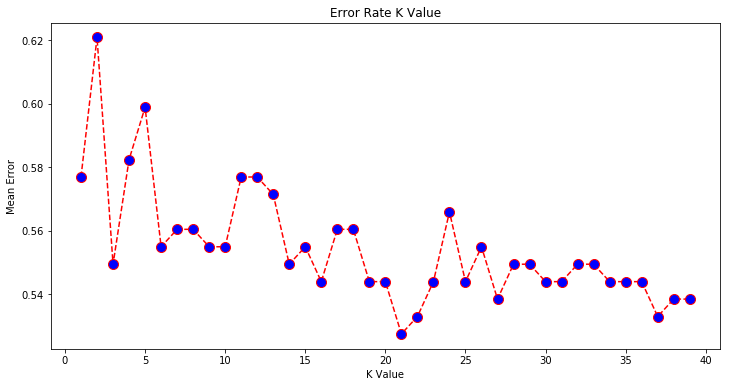

In [40]:
% matplotlib inline
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

### Scatter plot of correct categorization of GenBeanType

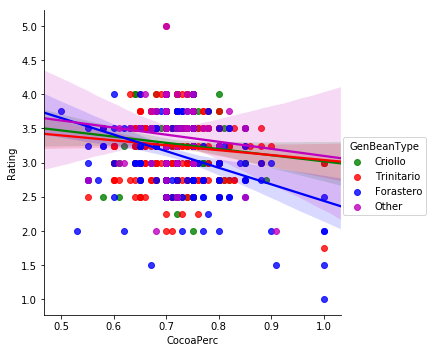

In [41]:
scatter = sns.lmplot(x = 'CocoaPerc', y = 'Rating', data = cacao2, hue = 'GenBeanType', palette=dict(Criollo="g", Forastero ="b", Trinitario="r", Other="m"))

### Graph the training set

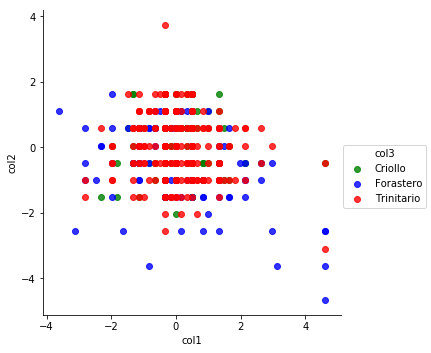

In [42]:
d = {'col1': X_train[:,0], 'col2': X_train[:,1], 'col3': Y_train}
df = pd.DataFrame(data = d)
df = df[df['col3'] != 'Other']
scatter = sns.lmplot(x = 'col1', y = 'col2', data = df, hue = 'col3', fit_reg = False, palette=dict(Criollo="g", Forastero ="b", Trinitario="r"))

### Graph the test set
Shows the correct categorization of GenBeanType

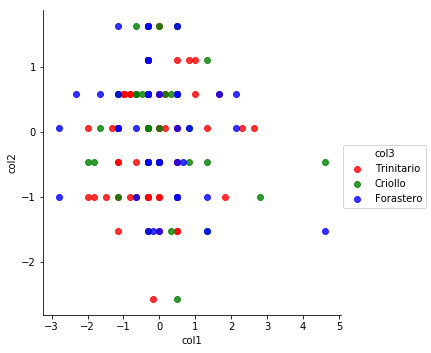

In [43]:
d = {'col1': X_test[:,0], 'col2': X_test[:,1], 'col3': Y_test}
df = pd.DataFrame(data = d)
df = df[df['col3'] != 'Other']
scatter = sns.lmplot(x = 'col1', y = 'col2', data = df, hue = 'col3', fit_reg = False, palette=dict(Criollo="g", Forastero ="b", Trinitario="r"))

### Graph the Categories the KNN algorithm determined

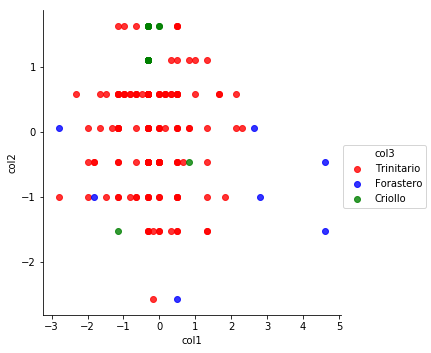

In [44]:
d = {'col1': X_test[:,0], 'col2': X_test[:,1], 'col3': y_pred}
df = pd.DataFrame(data = d)
df = df[df['col3'] != 'Other']
scatter = sns.lmplot(x = 'col1', y = 'col2', data = df, hue = 'col3', fit_reg = False, palette=dict(Criollo="g", Forastero ="b", Trinitario="r"))

# Fit to Linear Model
### Model predicts Rating from the Cocoa Percent

In [67]:
import statsmodels.api as sm
from scipy import stats

In [59]:
X1 = np.array(cacao2['CocoaPerc'])
X1 = X1.reshape(-1,1)
Y1 = np.array(cacao2['Rating'])
Y1 = Y1.reshape(-1,1)

In [68]:
X2 = sm.add_constant(X_train)
X3 = sm.add_constant(X_test)
est = sm.OLS(Y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     35.44
Date:                Tue, 01 May 2018   Prob (F-statistic):           4.11e-09
Time:                        00:09:37   Log-Likelihood:                -474.37
No. Observations:                 725   AIC:                             952.7
Df Residuals:                     723   BIC:                             961.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4494      0.206     21.559      0.0

### Predict Rating using X_test (X3)

In [69]:
ypred = est2.predict(X3)

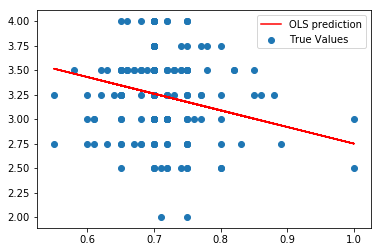

In [70]:
fig, ax = plt.subplots()
ax.plot(X_test, ypred, 'r', label = 'OLS prediction')
ax.scatter(X_test, Y_test, label = 'True Values')
ax.legend(loc='best')